In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

from ingestion import read_asec_data, read_asec_dictionary

In [5]:
# I am not at all sure if it's more appropriate to do this at a personal level or household level;
# I am guessing personal, since that is how federal income tax is administered, so we're going with
# that for now.

# We are also using the taxable income amount for the time being, again I don't know if this is necessarily
# the right approach, but it seems plausible as a first pass.

# TODO: Read up more on the various income metrics

records = read_asec_data('data/asec2016_pubuse_v2.dat', 'data/asec2016_dd.txt', 'person', ['MARSUPWT', 'TAX_INC'])
df = pd.DataFrame(records)
df.columns = [x.lower() for x in df.columns]
df['marsupwt'] = df['marsupwt'].astype(float) / 100
df['tax_inc'] = df['tax_inc'].astype(int)
df = df.sort_values('tax_inc')

In [ ]:
positives = hh_df[hh_df['tax_inc'] > 0]
positives_x = np.cumsum(positives['marsupwt']) / sum(positives['marsupwt'])
plt.plot(positives_x, positives['tax_inc'])

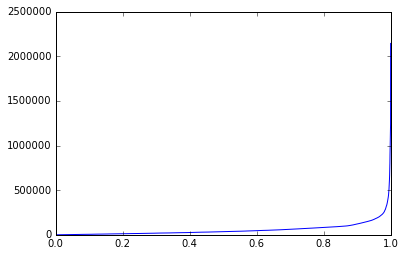

In [3]:
# We use MARSUPWT here; the earnings weight is specifically for calculating population estimates using the
# normal CPS fields, and we are using exclusively ASEC fields (if I understand this correctly)

records = read_asec_data('asec2016_pubuse_v2.dat', 'asec2016_dd.txt', 'person', ['MARSUPWT', 'TAX_INC'])
p_df = pd.DataFrame(records)
p_df.columns = [x.lower() for x in p_df.columns]
p_df['marsupwt'] = p_df['marsupwt'].astype(float) / 100
p_df['tax_inc'] = p_df['tax_inc'].astype(int)
p_df = p_df.sort_values('tax_inc')
positives = p_df[p_df['tax_inc'] > 0]
positives_x = np.cumsum(positives['marsupwt']) / sum(positives['marsupwt'])
plt.plot(positives_x, positives['tax_inc'])